<img src="../part_of_cover_bakker_post.png" width="800px">

The Python code provided below is from <br>
**Analytical Groundwater Modeling: Theory and Applications Using Python** <br>
by *Mark Bakker and Vincent Post* <br>
ISBN 9781138029392

The book is published by CRC press and is available [here](https://www.routledge.com/Analytical-Groundwater-Modeling-Theory-and-Applications-using-Python/Bakker-Post/p/book/9781138029392).

This Notebook is provided under the [MIT license](https://github.com/pythongroundwaterbook/analytic_gw_book/blob/main/LICENSE). 

<p>© 2022 Mark Bakker and Vincent Post</p>

# Steady two-dimensional flow in the vertical plane

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same at tight_layout after every plot

## Vertical anisotropy

In [2]:
# parameters
L = 1000 # length of domain, m
B = 300 # width of domain, m
kx = 5 # hydraulic conductivity in x-direction, m/d
kz = 1 # hydraulic conductivity in z-direction, m/d
a = -0.002 # head gradient in x and z directions

In [3]:
# solution
kt = np.sqrt(kx * kz)
qxt = -kt * a / np.sqrt(kz / kx)
qzt = -kt * a
xg, zg = np.meshgrid(np.linspace(0, L, 10), np.linspace(0, B, 10))
xt = xg * np.sqrt(kz / kx)
zt = zg
zetat = xt + 1j * zt
omt = -(qxt - 1j * qzt) * zetat
h = omt.real / kt
psi = omt.imag

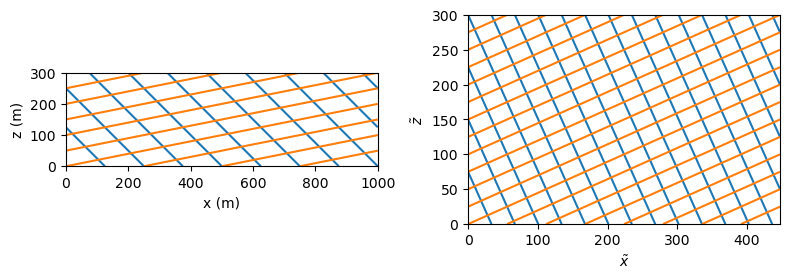

In [4]:
# basic flow net
plt.subplot(121, aspect=1) # problem domain
plt.contour(xg, zg, h, 10, colors='C0')
plt.contour(xg, zg, psi, 10, colors='C1')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.subplot(122, aspect=1) # transformed domain
plt.contour(xt, zt, h, 20, colors='C0')
plt.contour(xt, zt, psi, 20, colors='C1')
plt.xlabel(r'$\tilde{x}$')
plt.ylabel(r'$\tilde{z}$');

## Flow to a partially penetrating stream

<img src="figs/fig10.1.png" width=400>

In [5]:
# parameters
k = 10 # hydraulic conductivity, m/d
H = 10 # thickness of aquifer, m
d = 4 # depth of stream, m
UL = 0.2 # uniform flow far to the left, m^2/d
UR = -0.2 # uniform flow far to the right, m^2/d
hs = 0 # water level in stream

In [6]:
# solution
def zetafunc(tau, H=H, d=d):
    mu = np.tan(np.pi * d / (2 * H))
    lab = (-mu + np.sqrt(mu**2 + 1))**2
    z = -H / np.pi * np.log((tau - 1) / (tau + 1)) + \
         H / np.pi * np.log((tau - lab) / (tau + lab))
    return z

def taufunc(zeta, H=H, d=d):
    mu = np.tan(np.pi * d / (2 * H))
    lab = (-mu + np.sqrt(mu**2 + 1))**2
    Z = np.exp(np.pi * zeta / H)
    tau = (1 - lab) * (Z + 1) / (2 * (Z - 1)) + 0.5 * np.sqrt(
          ((lab - 1) * (Z + 1) / (Z - 1)) ** 2 + 4 * lab)
    return tau

In [7]:
# verification 
tau = 1.5 + 0j
zeta = zetafunc(tau)
print(f'given tau between points 1 and 2: {tau:.2f}')
print(f'zeta between points 1 and 2: {zeta:.2f}')
print(f'tau as function of zeta: {taufunc(zeta):.2f}')

given tau between points 1 and 2: 1.50+0.00j
zeta between points 1 and 2: 4.01+0.00j
tau as function of zeta: 1.50+0.00j


In [8]:
# solution
def omegafunc(tau, UL=UL, UR=UR, H=H, d=d, k=k, hs=0):
    mu = np.tan(np.pi * d / (2 * H))
    lab = (-mu + np.sqrt(mu**2 + 1))**2
    om = -UL / np.pi * np.log((tau - lab) / (tau + lab)) + \
          UR / np.pi * np.log((tau - 1) / (tau + 1)) + k * hs
    return om

# omega transformed domain
xi, eta = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 1.5, 100))
om_ref_plane = omegafunc(xi + eta * 1j)
# omega physical domain
xg, zg = np.meshgrid(np.linspace(-4 * H, 4 * H, 400), np.linspace(-H, 0, 100))
taug = taufunc(xg + zg * 1j)
omega = omegafunc(taug)
h = omega.real / k

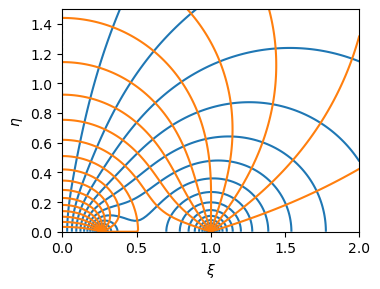

In [9]:
# basic plot flow net in transformed domain (right graph)
plt.subplot(111, aspect=1)
plt.contour(xi, eta, om_ref_plane.real, 20, colors='C0')
plt.contour(xi, eta, om_ref_plane.imag, 20, colors='C1')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$');

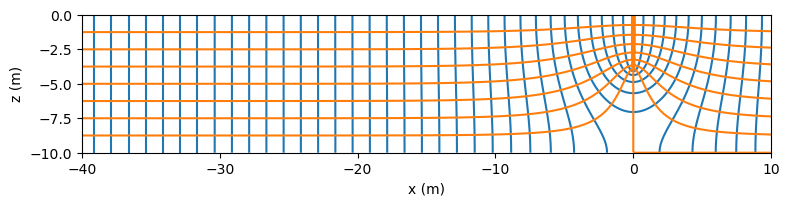

In [10]:
# basic flow net
plt.subplot(111, aspect=1, xlim=(-40, 10))
plt.contour(xg, zg, h, np.arange(0, 0.1, 0.0025), colors='C0')
plt.contour(xg, zg, omega.imag, np.arange(-0.4, 0.4, 0.025), colors='C1')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [11]:
# anisotropic parameters
kx = 10 # m/d
kz = 1 # m/d

In [12]:
# anisotropic solution
ktilde = np.sqrt(kx * kz)
xgtilde = xg * np.sqrt(kz / kx)
zgtilde = zg
omega_aniso = omegafunc(taufunc(xgtilde + zgtilde * 1j))
h_aniso = omega_aniso.real / ktilde
psi_aniso = omega_aniso.imag

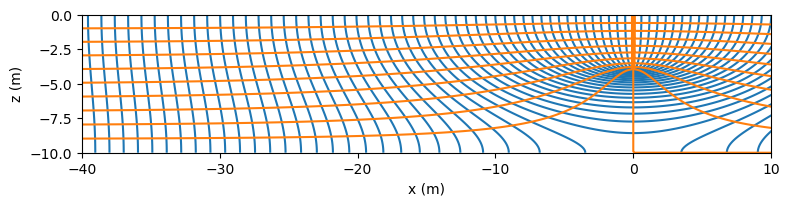

In [13]:
# basic flow net
plt.subplot(111, aspect=1, xlim=(-40, 10))
plt.contour(xg, zg, h_aniso, np.arange(0, 0.2, 0.002), colors='C0')
plt.contour(xg, zg, psi_aniso, np.arange(-0.4, 0.4, 0.02), colors='C1')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [14]:
# computation of C
def head0(z, UL=UL, UR=UR, H=H, d=d):
    zeta = 0 + z * 1j
    tau = taufunc(zeta, H=H, d=d)
    return omegafunc(tau, UL=UL, UR=UR, H=H, d=d).real / np.sqrt(kx * kz)

from scipy.integrate import quad
h0avg = quad(head0, a=-H, b=0, args=(UL, UR))[0] / H
C = (UL - UR) / (h0avg - 0)
print(f'Effective conducatance: C={C:.2f} m^2/d')
print(f'Dupuit head h0={h0avg:.3f} m for UL={UL} m^2/d and UR={UR} m^2/d')

Effective conducatance: C=18.70 m^2/d
Dupuit head h0=0.021 m for UL=0.2 m^2/d and UR=-0.2 m^2/d


In [15]:
# Dupuit solution
L = 40 # distance over which Dupuit solution is computed
h0 = 0
xdupuit = [-L, 0, L]
hdupuit1 = [UL * L / (k * H) + h0, h0, -UR * L / (k * H) + h0]

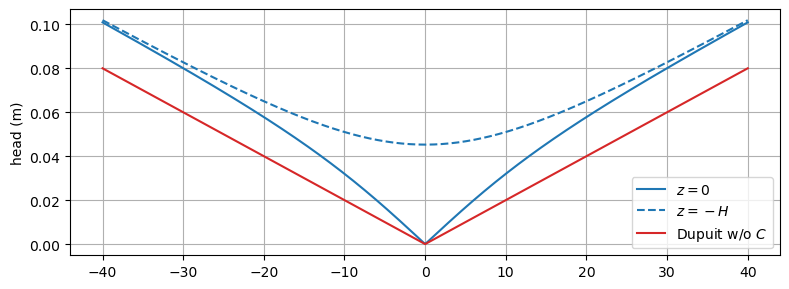

In [16]:
# basic plot
plt.plot(xg[0], h_aniso[-1], 'C0', label='$z=0$')
plt.plot(xg[0], h_aniso[0], 'C0--', label='$z=-H$')
plt.plot(xdupuit, hdupuit1, 'C3', label='Dupuit w/o $C$')
plt.ylabel('head (m)')
plt.grid()
plt.legend(loc='lower right');

In [17]:
# Dupuit solution with effective conductance
h0 = hs + (UL - UR) / C
hdupuit2 = [UL * L / (k * H) + h0, h0, -UR * L / (k * H) + h0]

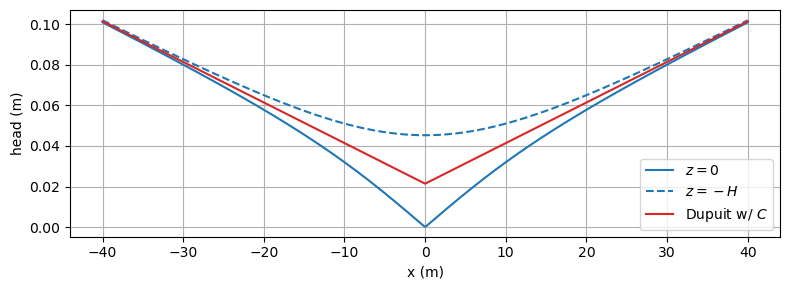

In [18]:
# basic plot
plt.plot(xg[0], h_aniso[-1], 'C0', label='$z=0$')
plt.plot(xg[0], h_aniso[0], 'C0--', label='$z=-H$')
plt.plot(xdupuit, hdupuit2, 'C3', label='Dupuit w/ $C$')
plt.xlabel('x (m)')
plt.ylabel('head (m)')
plt.grid()
plt.legend(loc='lower right');

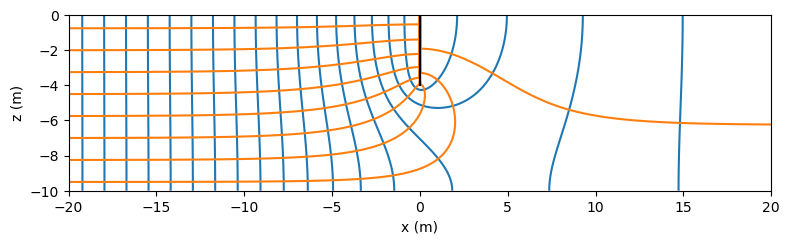

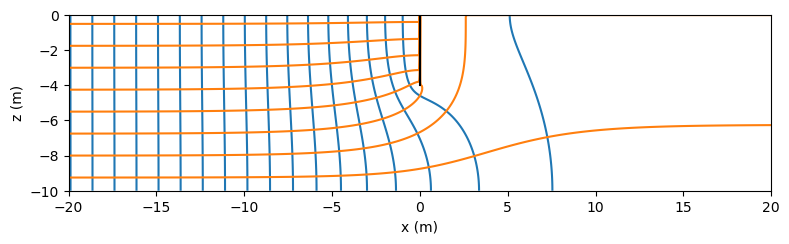

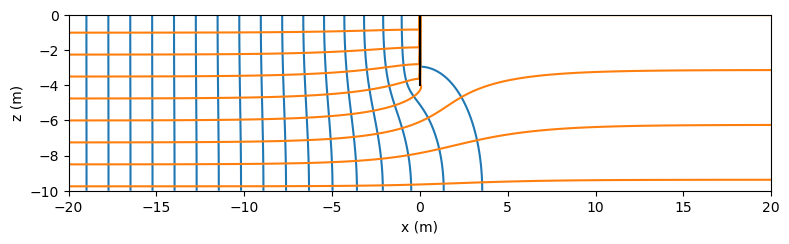

In [19]:
URlist = [-0.04, 0.04, 0.08]
for UR in URlist:
    xg, zg = np.meshgrid(np.linspace(-2 * H, 2 * H, 400), np.linspace(-H, 0, 100))
    taug = taufunc(xg + zg * 1j)
    omega = omegafunc(taug, UR=UR)
    h = omega.real / k
    plt.figure()
    plt.subplot(111, aspect=1)
    plt.contour(xg, zg, h, np.arange(0, 0.1, 0.0025), colors='C0')
    plt.contour(xg, zg, omega.imag, np.arange(-0.4, 0.4, 0.025), colors='C1')
    plt.plot([0, 0], [0, -d], 'k')
    plt.xlabel('x (m)')
    plt.ylabel('z (m)');

## Flow over a step in the base

<img src="figs/fig10.2.png" width=400>

In [20]:
# parameters
k = 10 # hydraulic conductivity, m/d
HL = 10 # aquifer thickness on left side, m
HR = 20 # aquifer thickness on right side, m
U = 0.1 # flow from left to right, m^2/d

In [21]:
# solution
def zetafunc(tau, HR=HR, HL=HL):
    lab = HL / HR
    zeta = -HR / np.pi * np.log((tau - lab) / (tau + lab)) + \
            HL / np.pi * np.log((tau - 1) / (tau + 1)) + \
           (HR - HL) * 1j
    return zeta

def omegafunc(tau, U=U, HR=HR, HL=HL):
    lab = HL / HR
    omega = -U / np.pi * np.log((tau - 1) * (tau + 1)) + \
             U / np.pi * np.log((tau - lab) * (tau + lab) / lab ** 2)
    return omega

In [22]:
# grid
d = 1e-14 # small offset
lab = HL / HR
xi1 = np.linspace(0, lab - d, 400)
xi2 = np.linspace(lab + d, 1 - d, 400)
xi3 = np.linspace(1 + d, 40, 400)
eta1 = np.linspace(0, 1, 400)
eta2 = np.linspace(1, 40, 400)
xi, eta = np.meshgrid(np.hstack((xi1, xi2, xi3)), np.hstack((eta1, eta2)))
zeta = zetafunc(xi + eta * 1j)
omega = omegafunc(xi + eta * 1j)

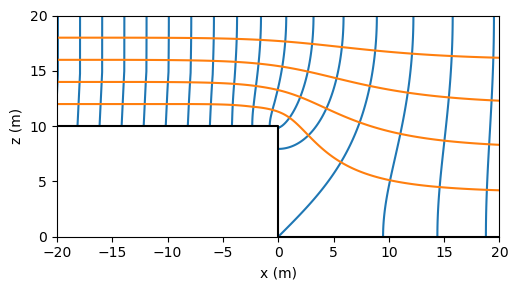

In [23]:
# basic plot
plt.subplot(111, aspect=1, xlim=(-20, 20))
plt.contour(zeta.real, zeta.imag, omega.real / k, np.arange(-0.1, 0.1, 0.002), colors='C0')
plt.contour(zeta.real, zeta.imag, omega.imag, np.arange(-0.1, 0, 0.02), colors='C1')
plt.plot([-40, 0, 0, 40], [10, 10, 0, 0], 'k')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [24]:
print(f'complex location of point 2: {zetafunc(1e-12j + 1e-12j):.2f}')
print(f'complex potential at point 2: {omegafunc(1e-12 + 1e-12j):.2f}')
print(f'complex location of point 4: {zetafunc(1e12 + 1e12j):.2f}')
print(f'complex location of point tau=0.7: {zetafunc(0.7 + 1e-12j):.2f}')
print(f'complex potential at point tau=0.7: {omegafunc(0.7 + 1e-12j):.2f}')

complex location of point 2: -0.00+0.00j
complex potential at point 2: 0.00+0.00j
complex location of point 4: 0.00+10.00j
complex location of point tau=0.7: 5.89+20.00j
complex potential at point tau=0.7: 0.02-0.10j


In [25]:
def findtau(tauvec, x, z):
    tau = tauvec[0] + tauvec[1] * 1j
    zetastar = zetafunc(tau)
    return ((zetastar.real - x) ** 2 + (zetastar.imag - z) ** 2)

from scipy.optimize import fmin
xi0, eta0 = fmin(findtau, (1, 1), args=(-50, 20), disp=0)
tau0 = xi0 + eta0 * 1j
print(f'tau: {tau0}')
print(f'zeta: {zetafunc(tau0)}')

tau: (0.9999999664789975+1.245910302309445e-11j)
zeta: (-49.99698501153817+19.99881690414834j)


In [26]:
# additional parameters anisotropic case 1
kx = 10 # horizontal hydraulic conductivity, m/d
kz = 1 # vertical hydraulic conductivity, m/d

In [27]:
# solution anisotropic case
ktilde = np.sqrt(kx * kz)
zetaaniso = zetafunc(xi + eta * 1j)
omeganiso = omegafunc(xi + eta * 1j)
xg = zetaaniso.real / np.sqrt(kz / kx)
zg = zetaaniso.imag
h = omeganiso.real / ktilde
psi = omeganiso.imag

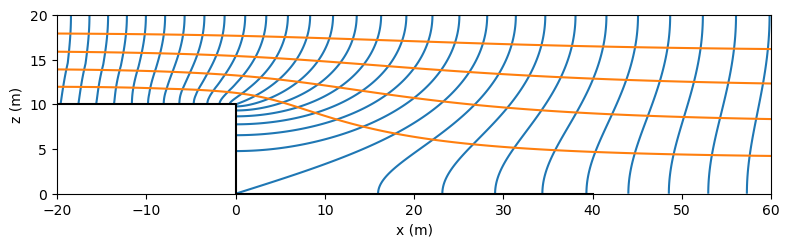

In [28]:
# basic plot anistropic case
plt.subplot(111, aspect=1, xlim=(-20, 60))
plt.contour(xg, zg, h, np.arange(-0.1, 0.1, 0.002), colors='C0')
plt.contour(xg, zg, psi, np.arange(-0.1, 0, 0.02), colors='C1')
plt.plot([-40, 0, 0, 40], [10, 10, 0, 0], 'k')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [29]:
# additional parameters anisotropic case 2
kx = 10 # horizontal hydraulic conductivity, m/d
kz = 1000 # vertical hydraulic conductivity, m/d
# solution anisotropic case 1
ktilde = np.sqrt(kx * kz)
zetaaniso = zetafunc(xi + eta * 1j)
omeganiso = omegafunc(xi + eta * 1j)
xg = zetaaniso.real / np.sqrt(kz / kx)
zg = zetaaniso.imag
h = omeganiso.real / ktilde
psi = omeganiso.imag

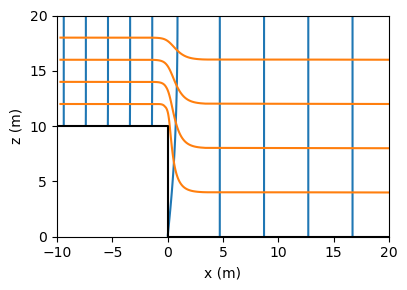

In [30]:
plt.subplot(111, aspect=1, xlim=(-10, 20))
plt.contour(xg, zg, h, np.arange(-0.1, 0.1, 0.002), colors='C0')
plt.contour(xg, zg, psi, np.arange(-0.1, 0, 0.02), colors='C1')
plt.plot([-10, 0, 0, 20], [10, 10, 0, 0], 'k')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

## Spatially varying head at the top of the aquifer

<img src="figs/fig10.3.png" width=400>

In [31]:
# parameters
k = 1 # hydraulic conductivity, m/d
L = 1200 # length of aquifer, m
H = 200 # thickness of aquifer, m
a = 0.2 # amplitude of head variation, m
p = 2 * L / 3 # period of head variation, m
A = k * a # amplitude of potential variation, m^2/d

In [32]:
# solution
def omega(x, z, H, A, p):
    zeta = x + 1j * z
    return A * np.cos(2 * np.pi * (zeta + H * 1j) / p) / \
               np.cosh(2 * np.pi * H / p)

def discomplex(x, z, H, A, p):
    zeta = x + 1j * z
    return 2 * np.pi * A / p * np.sin(2 * np.pi * (zeta + H * 1j) / p) / \
                               np.cosh(2 * np.pi * H / p)

xg, zg = np.meshgrid(np.linspace(0, L, 100), np.linspace(-H, 0, 100))
om = omega(xg, zg, H, A, p)
wdis = discomplex(xg, zg, H, A, p)
htop = om.real[-1] / k
qtop = -wdis.imag[-1]

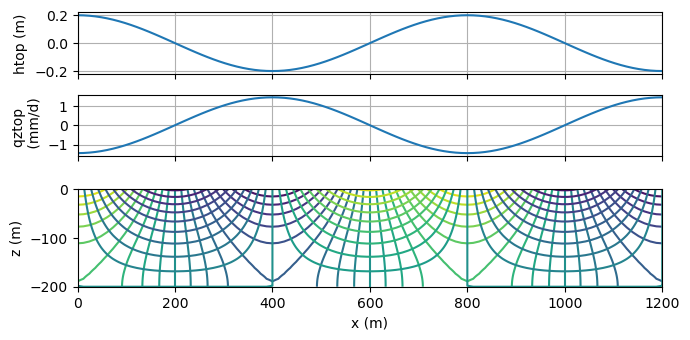

In [33]:
# basic plot h, qz, flownet, sharing the x-axis
fig, ax = plt.subplots(3, 1, sharex=True, squeeze=True, figsize=[7, 3.5],
                       gridspec_kw={'height_ratios':[1, 1, 2]})
plt.sca(ax[0])
plt.plot(xg[0], htop)
plt.ylabel('htop (m)')
plt.grid()
plt.sca(ax[1])
plt.plot(xg[0], qtop * 1000)
plt.ylabel('qztop \n (mm/d)')
plt.grid()
plt.sca(ax[2])
plt.contour(xg, zg, om.real / k, np.arange(-0.2, 0.21, 0.02))
plt.contour(xg, zg, om.imag, np.arange(-0.2, 0.21, 0.02))
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.axis('scaled');

In [34]:
# solution for flow cell of 1200 m
L = 1200
p = 2 * L # one flow cell
x = np.linspace(0, L, 100)
Qx2D = -omega(x, 0, H, A, p).imag # Qx2D = -psi
QxDupuit = k * H * a * 2 * np.pi / p * np.sin(2 * np.pi * x / p)
# grid of stream function
xg, zg = np.meshgrid(np.linspace(0, L, 400), np.linspace(-H, 0, 100))
psi2D = omega(xg, zg, H, A, p).imag
xd = xg[0]
zd = [-H, 0]
psiDupuit = np.zeros((2, len(xd)))
psiDupuit[1] = -k * H * a * 2 * np.pi / p * np.sin(2 * np.pi * xd / p)

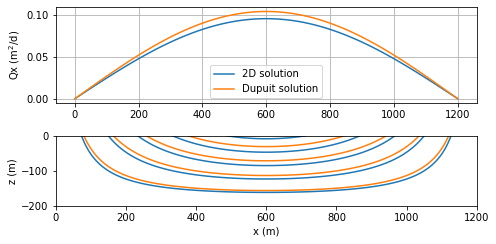

In [35]:
# basic plot
plt.figure(figsize=[7, 3.5])
plt.subplot(211)
plt.plot(x, Qx2D, label='2D solution')
plt.plot(x, QxDupuit, label='Dupuit solution')
plt.ylabel('Qx (m$^2$/d)')
plt.grid()
plt.legend()
plt.subplot(212, aspect=1)
plt.contour(xg, zg, psi2D, np.arange(-0.2, 0, 0.02), colors='C1')
plt.contour(xd, zd, psiDupuit, np.arange(-0.2, 0, 0.02), colors='C0')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [36]:
# additional parameters and changed parameters
delh = 2 # head drop over distance L, m
p = L / 3 # period of head varation, m
nterms = 100 # number of terms in Fourier series

In [37]:
# solution
xg, zg = np.meshgrid(np.linspace(0, L, 200), np.linspace(-H, 0, 200))
om = np.zeros(xg.shape, dtype='complex')
om -= 0.5 * delh
for n in range(1, nterms + 1, 2):
    A = 4 * k * delh / (n ** 2 * np.pi ** 2)
    om += omega(xg, zg, H, A, 2 * L / n)
om += omega(xg, zg, H, k * a, p)
htop = om.real[-1] / k

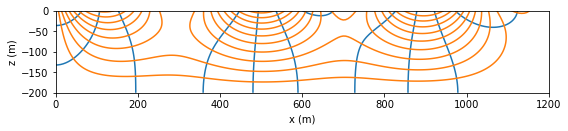

In [38]:
# basic flownet
plt.subplot(111, aspect=1)
plt.contour(xg, zg, om.real, 10, colors='C0')
plt.contour(xg, zg, om.imag, 10, colors='C1')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

## Interface flow towards the coast

<img src="figs/fig10.4.png" width=400>

In [39]:
# parameters
k = 10 # hydraulic conductivity, m/d
rhof = 1000 # density freshwater, kg/m^3
rhos = 1025 # density of saltwater, kg/m^3
U = 0.4 # flow towards the coast, m^2/d

In [40]:
# solution
alpha = rhof / (rhos - rhof)
n = 100
zeta_streamlines = []
zeta_equipotentials = []
for psi in np.linspace(0, U, 6):
    omega = np.linspace(0, 2, n) + 1j * psi
    zeta = -omega**2 * alpha / (2 * k * U)
    zeta_streamlines.append(zeta)
for phi in np.arange(0, 2, U / 6):
    omega = phi + 1j * np.linspace(0, U, n)
    zeta = -omega**2 * alpha / (2 * k * U)
    zeta_equipotentials.append(zeta)
zetatip = -(1j * U) ** 2 * alpha / (2 * k * U)
print(f'location of the tip: {zetatip.real: .2f} m')

location of the tip:  0.80 m


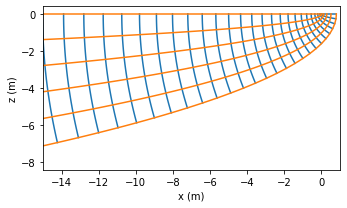

In [41]:
# basic plot
plt.subplot(111, aspect=1, xlim=(-15, 1))
for zeta in zeta_equipotentials:
    plt.plot(zeta.real, zeta.imag, 'C0')
for zeta in zeta_streamlines:
    plt.plot(zeta.real, zeta.imag, 'C1')
plt.xlabel('x (m)')
plt.ylabel('z (m)');

In [42]:
# additional parameters anisotropic case
kx = k
kz = k / 10

In [43]:
# isotropic solution
xtip = U * alpha / (2 * k)
xglover = np.linspace(-150, xtip, 100)
zglover = -np.sqrt(U * alpha / k * (U * alpha / k - 2 * xglover))
# aniosotropic solution
xtipaniso = U * alpha / (2 * kz)
xaniso = np.linspace(-150, xtipaniso, 200)
zaniso = -np.sqrt(U * alpha / kx * (U * alpha / kz - 2 * xaniso))
print(f'location of the tip for anisotropic case: {xtipaniso: 0.2f} m')
#
xdupuit = np.linspace(-150, 0, 100)
zdupuit = -np.sqrt(-2 * U * alpha * xdupuit / k)

location of the tip for anisotropic case:  8.00 m


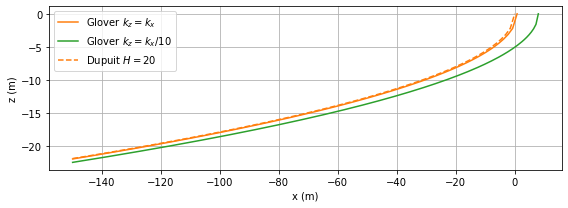

In [44]:
# basic plot (Fig. 10.15)
plt.plot(xglover, zglover, 'C1', label='Glover $k_z=k_x$')
plt.plot(xaniso, zaniso, 'C2', label='Glover $k_z=k_x/10$')
plt.plot(xdupuit, zdupuit, 'C1--', label='Dupuit $H=20$')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.grid()
plt.legend();

## Interface flow below a strip island

<img src="figs/fig10.5.png" width=400>

In [45]:
# parameters
k = 10 # hydraulic conductivity, m/d
L = 1000 # half width of island, m
N = 0.001 # areal recharge, m/d
rhof = 1000 # density freshwater, kg/m^3
rhos = 1025 # density of saltwater, kg/m^3
alpha = rhof / (rhos - rhof)

In [46]:
# solution
def omega(zeta, k=k, alpha=alpha, L=L, N=N):
    om = -1j * N * zeta + np.sqrt(N ** 2 * (L ** 2 - zeta ** 2) + 
                                  N * k * (L ** 2 - zeta ** 2) / alpha)
    return om

# compute interface
ng = 201
xtip = L * np.sqrt(1 + N * alpha / k)
print(f'length outflow zone: {xtip - L:0.2f} m')
xi = np.linspace(-xtip + 1e-12, xtip - 1e-12, ng)
zi = -np.sqrt(N * alpha / k * L ** 2 - N * alpha / (N * alpha + k) * xi ** 2)
zcenter = -L * np.sqrt(N * alpha / k)
print(f'elevation of interface at center of island: {zcenter:0.2f} m')
# compute grid for contouring
xg = xi * np.ones((50, ng))
zg = np.zeros_like(xg)
for i in range(ng):
    zg[:, i] = np.linspace(zi[i], -1e-12, 50)
om = omega(xg + 1j * zg)

length outflow zone: 2.00 m
elevation of interface at center of island: -63.25 m


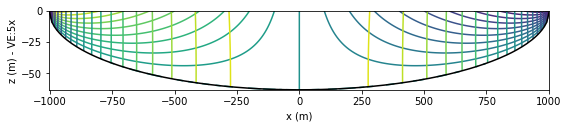

In [47]:
# basic plot
plt.subplot(111, aspect=5, xlim=(-xtip, xtip))
plt.contour(xg, zg, om.imag, 20)
plt.contour(xg, zg, om.real, 20)
plt.plot(xi, zi, 'k')
plt.xlabel('x (m)')
plt.ylabel('z (m) - VE:5x');

In [48]:
# additional parameters for anisotropic case
kx = k
kz = kx / 20

In [49]:
# solution
xtipaniso = L * np.sqrt(1 + N * alpha / kz)
xaniso = np.linspace(-xtipaniso + 1e-12, xtipaniso - 1e-12, 400)
zianiso = -np.sqrt(N * alpha / kx * L ** 2 - 
                   N * alpha / (N * alpha + kz) * kz / kx * xaniso ** 2)
xdupuit = np.linspace(-L, L, 200)
zidupuit = -np.sqrt(N * alpha / kx * (L ** 2 - xdupuit ** 2))

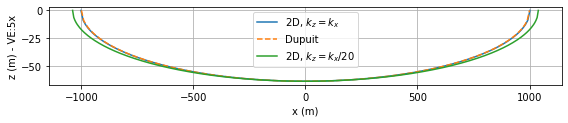

In [50]:
# basic plot
plt.subplot(111, aspect=5)
plt.plot(xi, zi, label='2D, $k_z=k_x$')
plt.plot(xdupuit, zidupuit, '--', label='Dupuit')
plt.plot(xaniso, zianiso, label='2D, $k_z=k_x/20$')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('z (m) - VE:5x')
plt.legend();